In [1]:
library(tidyverse) 
library(Stat2Data) 
data("Hawks") 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
hawksSmall <- drop_na(select(Hawks, Age, Day, Month, Year, CaptureTime, Species, Wing, Weight, Tail)) 

In [3]:
dim(hawksSmall)  # 897*9

[1] 897   9

In [4]:
# hawksSmall
head(hawksSmall)

,Age,Day,Month,Year,CaptureTime,Species,Wing,Weight,Tail
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>
1,I,19,9,1992,13:30,RT,385,920,219
2,I,22,9,1992,10:30,RT,376,930,221
3,I,23,9,1992,12:45,RT,381,990,235
4,I,23,9,1992,10:50,CH,265,470,220
5,I,27,9,1992,11:15,SS,205,170,157
6,I,28,9,1992,11:25,RT,412,1090,230


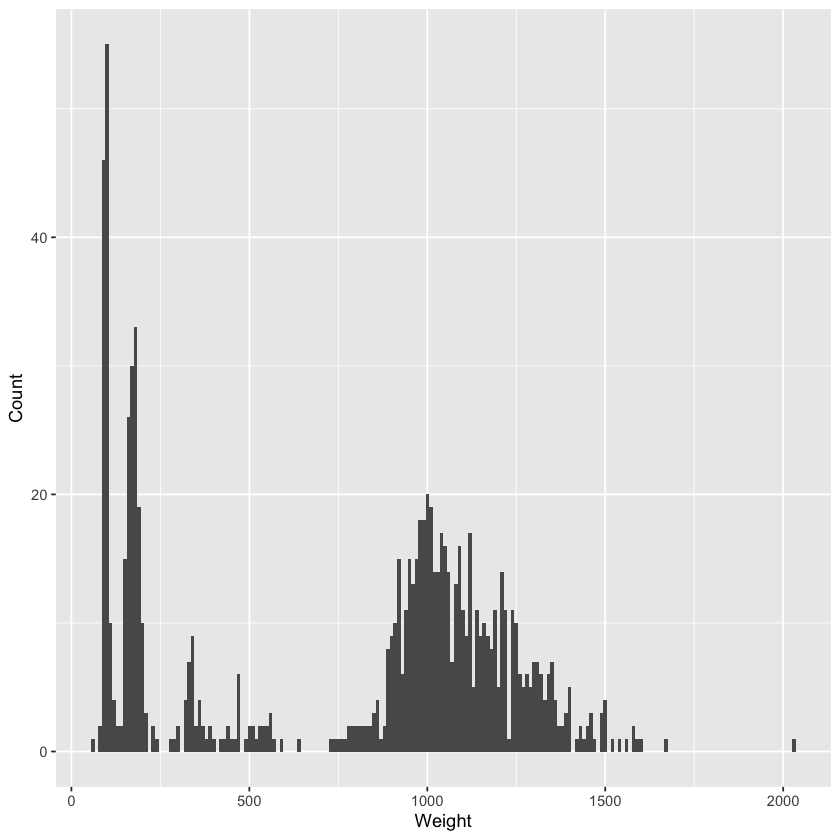

In [5]:
q_2_plot <- ggplot(data=hawksSmall, aes(x=Weight)) + geom_histogram(binwidth = 10) + xlab("Weight") + ylab("Count")
q_2_plot

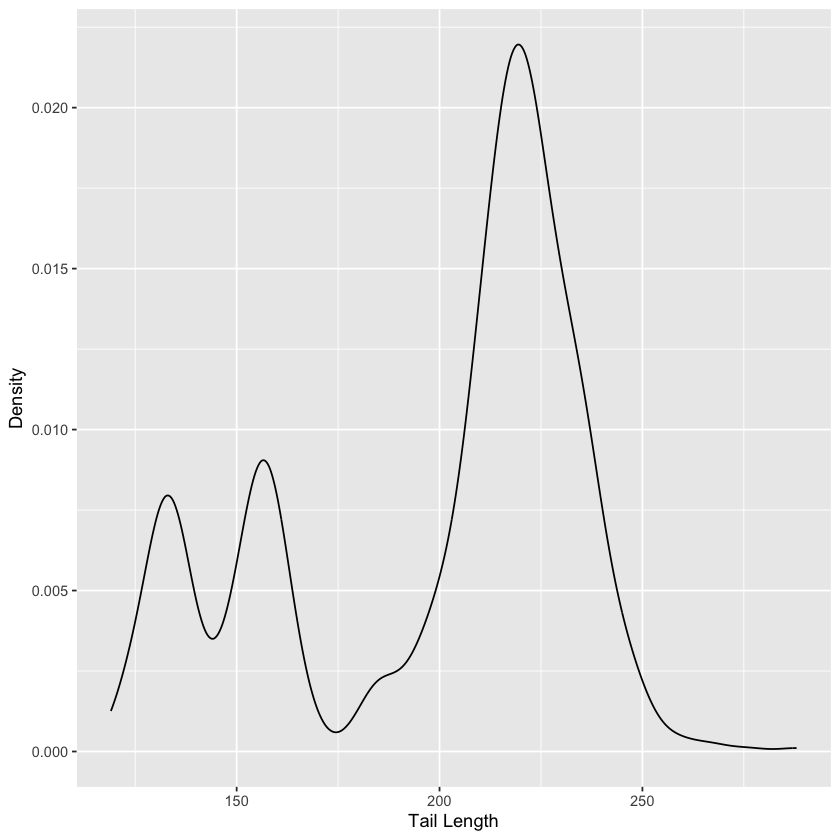

In [6]:
q_3_plot <- ggplot(data=hawksSmall, aes(x=Tail)) + geom_density(adjust=0.5) + xlab("Tail Length") + ylab('Density')
q_3_plot

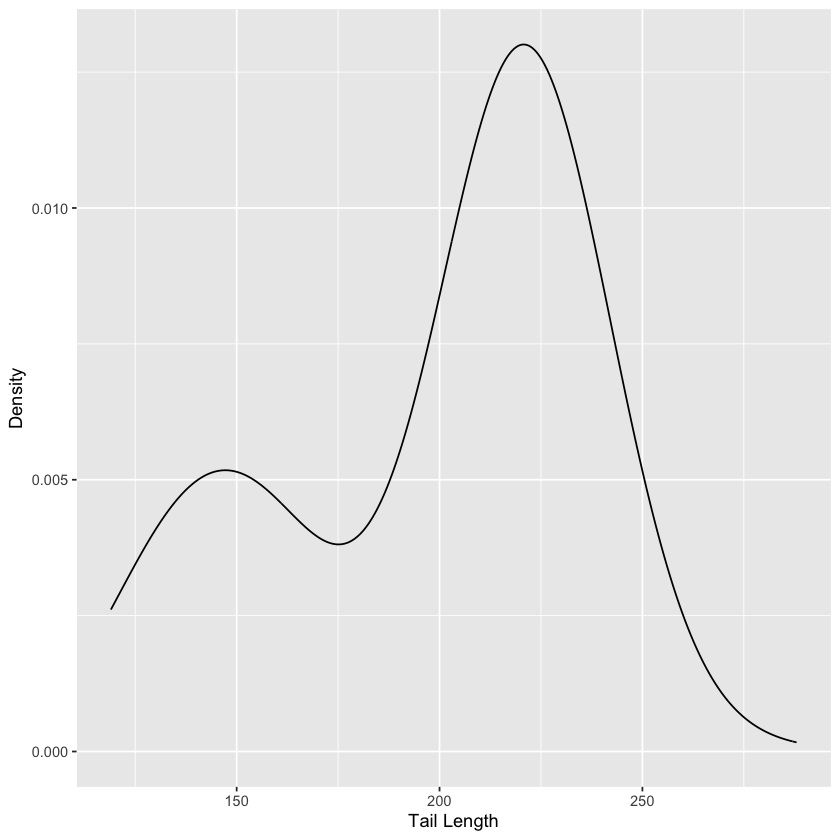

In [7]:
q_3_plot_pro <- ggplot(data=hawksSmall, aes(x=Tail)) + geom_density(adjust=2) + xlab("Tail Length") + ylab('Density')
q_3_plot_pro

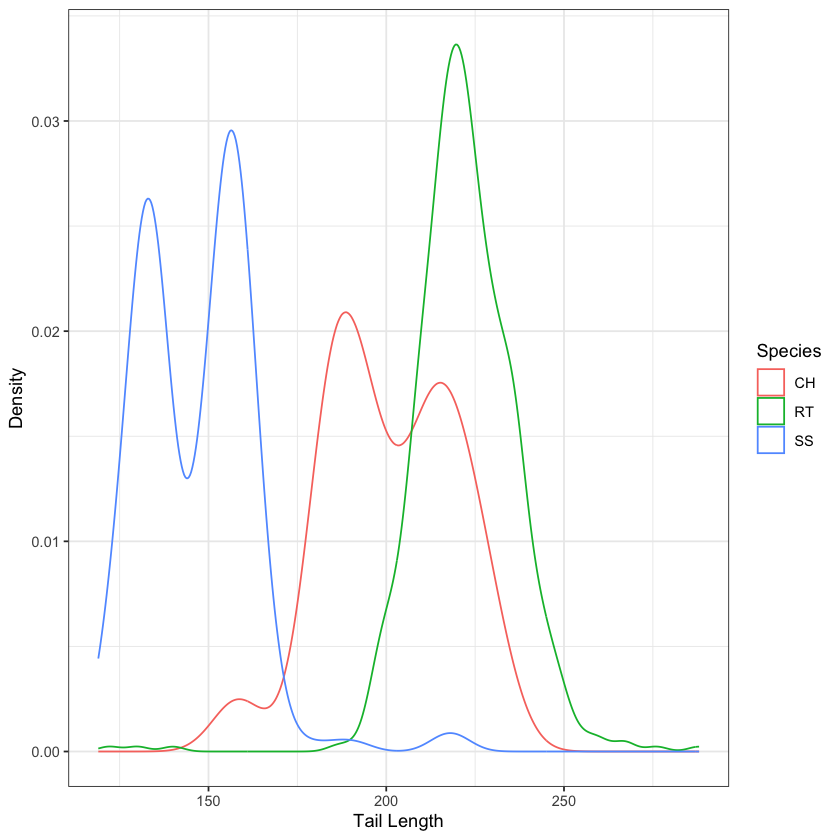

In [8]:
q_4_plot <- ggplot(data=hawksSmall, aes(x=Tail, color=Species)) + geom_density()  +theme_bw() + xlab("Tail Length") + ylab("Density")
q_4_plot

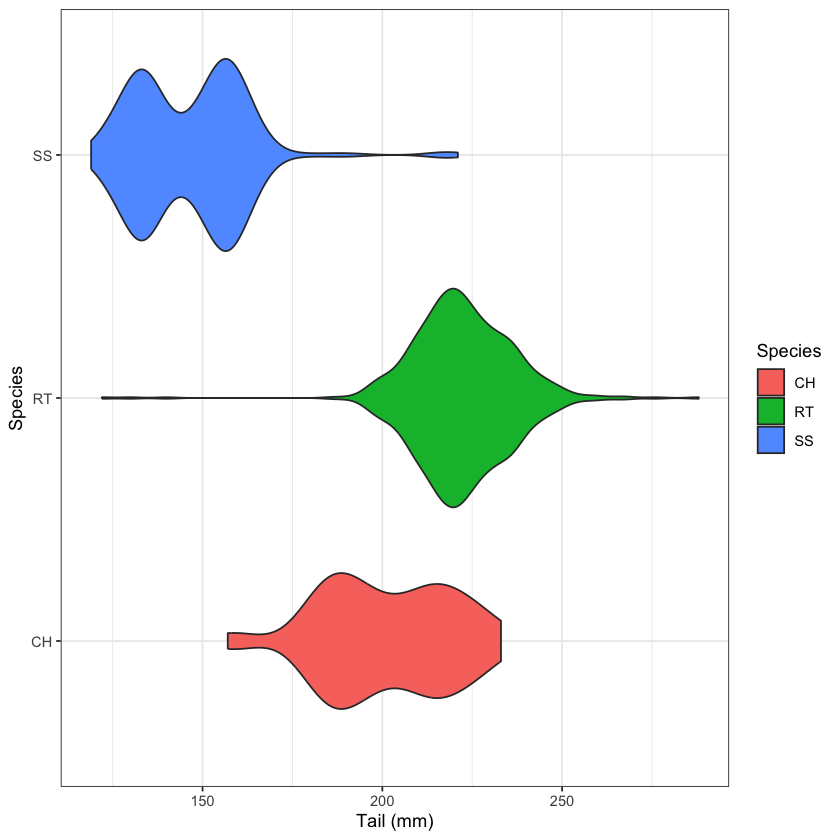

In [9]:
q_5_plot <- ggplot(data=hawksSmall, aes(x=Tail, y=Species, fill=Species))+geom_violin()+theme_bw()+xlab("Tail (mm)")
q_5_plot

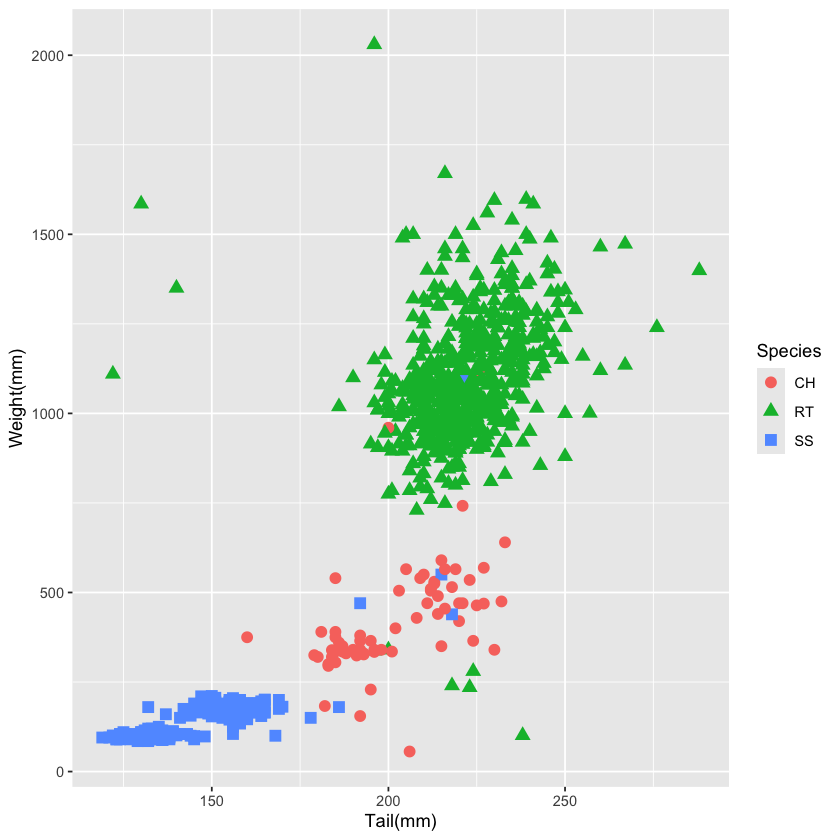

In [10]:
q_6_plot <- ggplot(data=hawksSmall, aes(y=Weight, x=Tail)) + ylab("Weight(mm)") + xlab("Tail(mm)") + geom_point(size=3, aes(color=Species, shape=Species))
q_6_plot

`geom_smooth()` using formula = 'y ~ x'


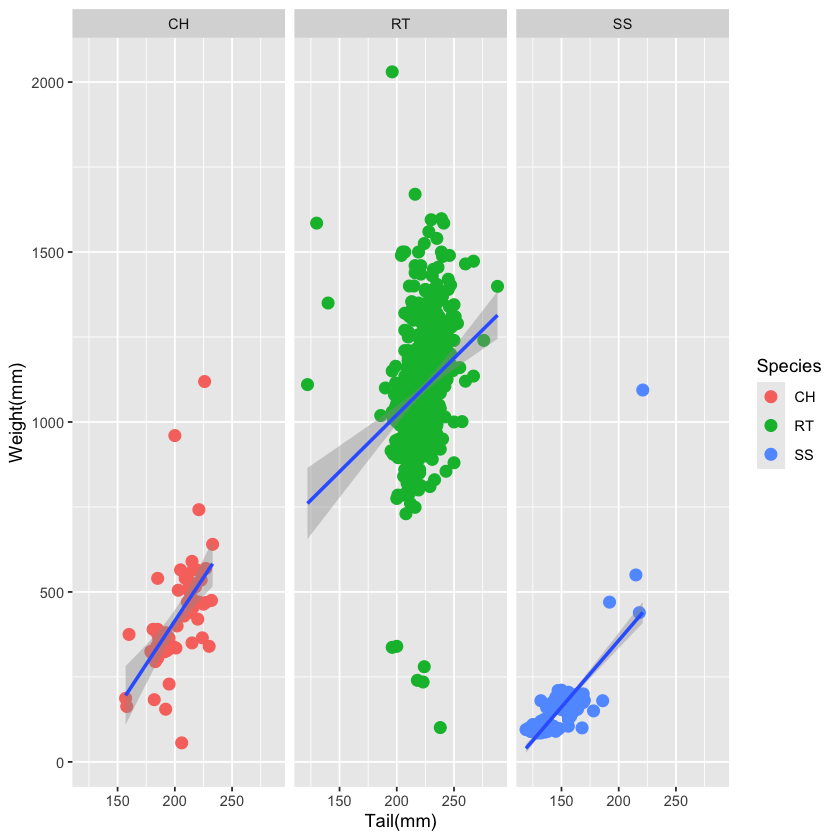

In [11]:
q_7_plot <- ggplot(data=hawksSmall, aes(y=Weight, x=Tail)) + ylab("Weight(mm)") + xlab("Tail(mm)") + geom_point(size=3, aes(color=Species)) + facet_wrap(~Species) + geom_smooth(method="lm")
q_7_plot 

In [12]:
heaviest_hawk_index <- which.max(hawksSmall$Weight)
# print(heaviest_hawk)  # index
weight_result <- hawksSmall$Weight[heaviest_hawk_index]
print(weight_result)  # according to the specific index
tail_result <- hawksSmall$Tail[heaviest_hawk_index]
print(tail_result)  # according to the specific index
# (2030, 196)

[1] 2030
[1] 196


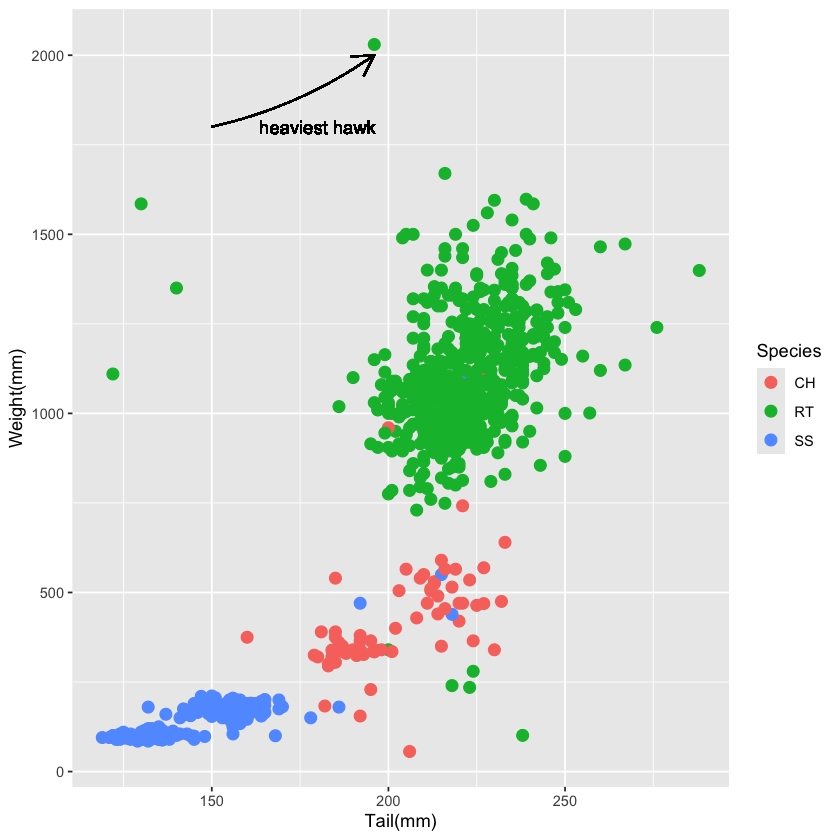

In [13]:
q_8_plot <- ggplot(data=hawksSmall, aes(y=Weight, x=Tail)) + ylab("Weight(mm)") + xlab("Tail(mm)") + geom_point(size=3, aes(color=Species)) + 
    geom_curve(x=150, xend=196, y=1800, yend=2000, arrow=arrow(length=unit(0.5, 'cm')), curvature=0.1) + geom_text(x=180, y=1800, label="heaviest hawk")
q_8_plot 

In [14]:
# 2

In [15]:
choose(8,3)

[1] 56

In [16]:
prob_red_spheres <- function(q) {
    numerator <-  choose(22, q) * 3^q * 7^(22-q)
    denominator <- 10 ^ 22
    return (numerator / denominator)
}  # 根据课件给出的公式

prob_red_spheres(10)  # 好耶 这个是对的

[1] 0.05285129

In [17]:
num_reds <- c(1:22)  # 拿22次球, 每次拿出来是红球的概率, 22次红球的概率几乎为零:(
prob <- numeric(22)
for (i in num_reds) {
    prob[i] <- prob_red_spheres(i)
}

prob_by_num_reds <- data.frame(num_reds = num_reds, prob = prob)
dim(prob_by_num_reds)
# head(prob_by_num_reds)
prob_by_num_reds  # 记住这个对象, 它的prob很关键, 这个可以看作是用公式算的 期望理论值

[1] 22  2

num_reds,prob
<int>,<dbl>
1,3.686403e-03
2,1.658881e-02
3,4.739661e-02
4,9.648595e-02
5,1.488640e-01
6,1.807635e-01
7,1.770744e-01
8,1.422919e-01
9,9.486130e-02


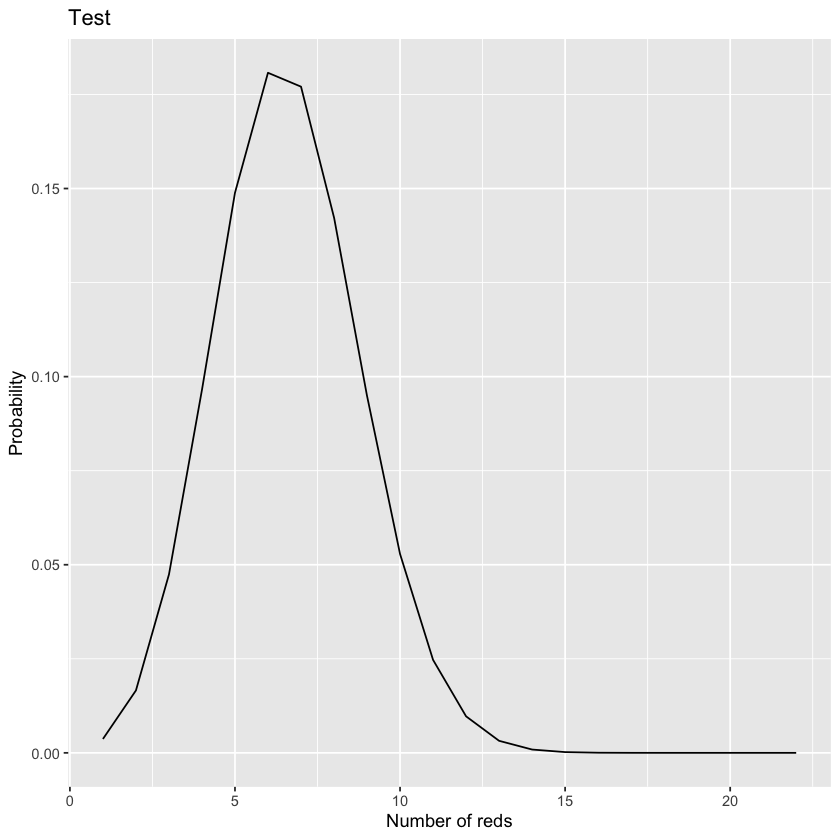

In [18]:
library(ggplot2)
ggplot(prob_by_num_reds, aes(x = num_reds, y = prob)) + geom_line() + labs(title = "Test", x = "Number of reds", y = "Probability")

In [19]:
sample(10, 22, replace=TRUE)  # 模拟拿球实验, 10个球, 有放回抽样

[1]  8  7  6  4  3  6  4  9  9  8  7  9  6  7  3  1  3  8  2  5 10  4

In [20]:
set.seed(0) 
for(i in 1:5){ 
print(sample(100,5,replace=FALSE)) 
} 

print("-----------")

set.seed(1) 
print(sample(100,5,replace=FALSE)) 
set.seed(1) 
print(sample(100,5,replace=FALSE)) 
set.seed(1) 
print(sample(100,5,replace=FALSE)) 
print("-----------")

set.seed(0) 
for(i in 1:5){ 
print(sample(100,5,replace=FALSE)) 
} 

[1] 14 68 39  1 34
[1] 87 43 14 82 59
[1] 51 97 85 21 54
[1] 74  7 73 79 85
[1]  37  89 100  34  99
[1] "-----------"
[1] 68 39  1 34 87
[1] 68 39  1 34 87
[1] 68 39  1 34 87
[1] "-----------"
[1] 14 68 39  1 34
[1] 87 43 14 82 59
[1] 51 97 85 21 54
[1] 74  7 73 79 85
[1]  37  89 100  34  99


In [21]:
itermap <- function(.x, .f) {  # 传入两个形参
    result <- list()  # 空列表
    for (item in .x) {  # 遍历传入的第一个形参的每个元素, 从而运行第二个形参(也就是函数)
        result <- c(result, list(.f(item)))  # list()转换成一个列表元素, 和"第一个形参的每个元素"一起加到result里面
    } 
    return(result)  # 返回列表
}

itermap(c(1,2,3), function(x){ return(c(x,x^3)) }) 

[[1]]
[1] 1 1

[[2]]
[1] 2 4

[[3]]
[1] 3 9

In [22]:
itermap_dbl <- function(.x, .f) {  # 传入两个形参
    result <- numeric(length(.x))  # 初始化一个长度等于 .x 的数值型向量result
    for (i in 1:length(.x)) {  # 循环是利用索引进行遍历, 不是元素本身
        result[i] <- .f(.x[[i]])  # 使用 [[i]] 来访问 .x 中第 i 个元素
    } 
    return(result) 
} 


itermap_dbl(c(1,2,3), function(x){ return(x^3) }) 

[1]  1  8 27

In [23]:
num_trials<-1000 # 进行1000次实验, 从10个球中有放回抽样22次
set.seed(0) # set the random seed 

# 管道符号%>%: 将左侧的结果传递给右侧的函数作为输入, 避免函数嵌套
# mutate(): 为数据框增加或修改列
sampling_with_replacement_simulation <- data.frame(trial=1:num_trials) %>% 
    mutate(sample_balls = itermap(.x=trial, function(x){sample(10,22, replace = TRUE)})) %>%  # 每一行都进行一次实验, 一共1000行
    mutate(num_reds = itermap(sample_balls, function(x){return(c(sum(x %in% c(1, 2, 3)))) } ))  # 红色球{1, 2, 3}出现的次数, 累加


head(sampling_with_replacement_simulation)
sampling_with_replacement_simulation

,trial,sample_balls,num_reds
,<int>,<list>,<list>
1,1,"9, 4, 7, 1, 2, 7, 2, 3, 1, 5, 5, 10, 6, 10, 7, 9, 5, 5, 9, 9, 5, 5",5
2,2,"2, 10, 9, 1, 4, 3, 6, 10, 10, 6, 4, 4, 10, 9, 7, 6, 9, 8, 9, 7, 8, 6",3
3,3,"10, 7, 3, 10, 6, 8, 2, 2, 6, 6, 1, 3, 3, 8, 6, 7, 6, 8, 7, 1, 4, 8",7
4,4,"9, 9, 7, 4, 7, 6, 1, 5, 6, 1, 9, 7, 7, 3, 6, 2, 10, 10, 7, 3, 2, 10",6
5,5,"1, 10, 10, 8, 10, 5, 7, 8, 5, 6, 8, 1, 3, 10, 3, 1, 6, 6, 4, 9, 5, 1",6
6,6,"3, 6, 3, 7, 3, 3, 1, 9, 2, 8, 6, 1, 2, 7, 7, 4, 9, 8, 3, 5, 3, 4",10


trial,sample_balls,num_reds
<int>,<list>,<list>
1,"9, 4, 7, 1, 2, 7, 2, 3, 1, 5, 5, 10, 6, 10, 7, 9, 5, 5, 9, 9, 5, 5",5
2,"2, 10, 9, 1, 4, 3, 6, 10, 10, 6, 4, 4, 10, 9, 7, 6, 9, 8, 9, 7, 8, 6",3
3,"10, 7, 3, 10, 6, 8, 2, 2, 6, 6, 1, 3, 3, 8, 6, 7, 6, 8, 7, 1, 4, 8",7
4,"9, 9, 7, 4, 7, 6, 1, 5, 6, 1, 9, 7, 7, 3, 6, 2, 10, 10, 7, 3, 2, 10",6
5,"1, 10, 10, 8, 10, 5, 7, 8, 5, 6, 8, 1, 3, 10, 3, 1, 6, 6, 4, 9, 5, 1",6
6,"3, 6, 3, 7, 3, 3, 1, 9, 2, 8, 6, 1, 2, 7, 7, 4, 9, 8, 3, 5, 3, 4",10
7,"2, 1, 7, 9, 10, 10, 2, 2, 3, 1, 2, 3, 3, 3, 8, 9, 2, 10, 8, 10, 3, 5",12
8,"9, 5, 7, 5, 6, 4, 2, 1, 3, 8, 9, 6, 1, 4, 5, 9, 5, 8, 4, 1, 9, 5",5
9,"1, 5, 4, 10, 10, 9, 8, 5, 5, 6, 6, 2, 2, 8, 4, 10, 8, 5, 5, 8, 8, 7",3


In [24]:
num_reds_in_simulation<-sampling_with_replacement_simulation %>% pull(num_reds)  # 从数据框中提取出指定的列: 每次模拟实验, 都有多少红球? 1个? 10个? 22个?

# prob_by_num_reds 的形状是 (22,2) 代表着22个理论期望数值
# prob_by_num_reds 是之前计算的那个对象
prob_by_num_reds<-prob_by_num_reds %>%  # 用管道符号操作 dataframe
    mutate(predicted_prob=itermap_dbl(.x=num_reds, function(.x) sum(num_reds_in_simulation==.x))/num_trials)  # 1000次实验中, 这些红球出现的概率都是多少?
                                      
# 关键: sum(num_reds_in_simulation == .x)                                 
# 计算这个布尔向量中 "TRUE" 的数量, 即模拟中观察到 num_reds == .x 的次数 
# 结果除以总试验次数 num_trials 计算出每个 num_reds 值 (1 ~ 22) 对应的概率

# .x: prob_by_num_reds里的从 1~22
# num_reds_in_simulation: 你模拟的实验结果 很多很多5个红球, 3个红球, 7个红球, 6个红球, 6个红球 (很少出现大于10的)
                                      
prob_by_num_reds
                                      
# prob 是之前 prob_by_num_reds的理论期望数值
# predicted_prob 是模拟出来的数值

num_reds,prob,predicted_prob
<int>,<dbl>,<dbl>
1,3.686403e-03,0.005
2,1.658881e-02,0.019
3,4.739661e-02,0.054
4,9.648595e-02,0.104
5,1.488640e-01,0.150
6,1.807635e-01,0.204
7,1.770744e-01,0.155
8,1.422919e-01,0.150
9,9.486130e-02,0.073


In [25]:
red_amount_in_simulation <- c(3, 2, 1, 3, 2)  # 这是5次实验, 第一次实验拿到了3个红球, 第二次实验拿到了2个红球...
red_amount_in_simulation == 3  
sum(red_amount_in_simulation == 3)  # 2次出现 3个小球是红色的情况
# 之前说过的有1000种这样的实验, 所以会在1000次实验里找相同的情况, 之后除以1000这个次数

[1]  TRUE FALSE FALSE  TRUE FALSE

[1] 2

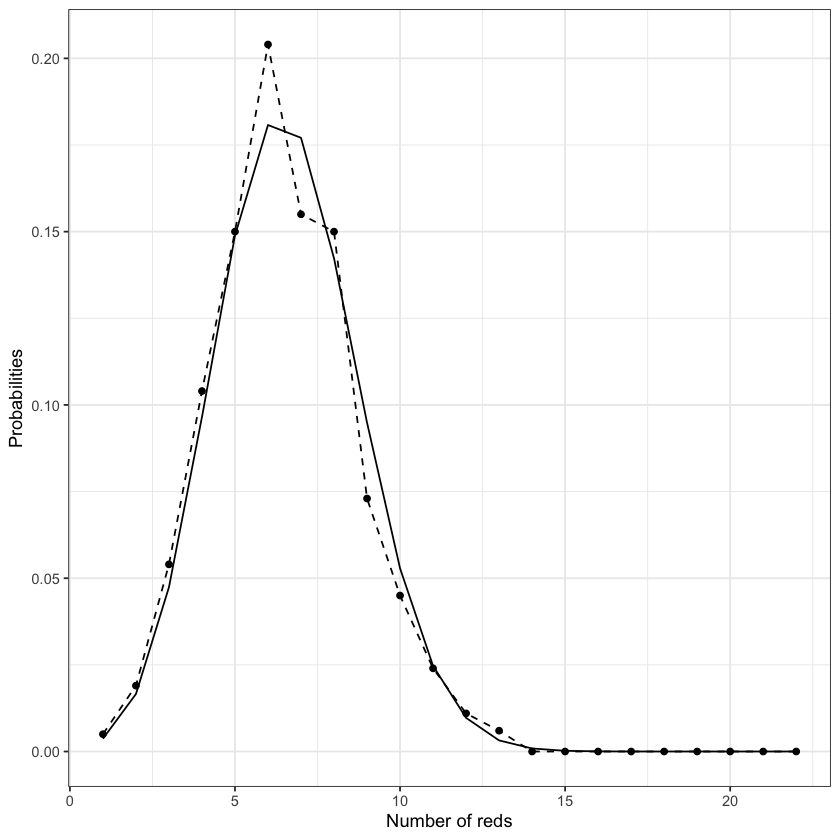

In [26]:
prob_by_num_reds %>% rename(TheoreticalProbability=prob, EstimatedProbability=predicted_prob) %>%  # 重命名  
    ggplot() + 
    geom_line(aes(x=num_reds, y=TheoreticalProbability)) + 
    geom_line(aes(x=num_reds, y=EstimatedProbability), linetype='dashed') +  # 虚线
    geom_point(aes(x=num_reds, y=EstimatedProbability)) +  # 散点
    theme_bw() + xlab("Number of reds") + ylab("Probabilities")

In [27]:
# 100个球, 50个红色, 30个蓝色, 20个绿色, 取出10个不放回
# 你选择的颜色中缺少一种或多种颜色的概率是多少? 首先使用前一个问题的想法进行模拟研究来回答这个问题
# 1-50 红色 
# 51-80 蓝色
# 81-100 绿色

In [28]:
set.seed(68)
experiment_number<-10

In [29]:
simulation_experiment <- data.frame(experiment_number = 1:experiment_number) %>%
    mutate(experiment_result = itermap(.x = experiment_number, function(x) {sample(100, 10, replace = FALSE)})) %>%
    mutate(reds_amount = itermap(experiment_result, function(x){return(c(sum(x %in% c(1:50)))) } )) %>%
    mutate(greens_amount = itermap(experiment_result, function(x){return(c(sum(x %in% c(51:80)))) } )) %>%
    mutate(blues_amount = itermap(experiment_result, function(x){return(c(sum(x %in% c(81:100)))) } )) %>%
    mutate(
    reds_amount = as.numeric(reds_amount),
    greens_amount = as.numeric(greens_amount),
    blues_amount = as.numeric(blues_amount)
    )

print(simulation_experiment)

   experiment_number                      experiment_result reds_amount
1                  1   44, 69, 5, 19, 71, 50, 16, 72, 89, 2           6
2                  2   31, 5, 32, 40, 93, 42, 1, 85, 49, 26           8
3                  3  87, 46, 58, 68, 42, 4, 57, 76, 26, 64           4
4                  4   92, 83, 46, 9, 34, 39, 11, 93, 28, 2           7
5                  5    65, 70, 45, 39, 3, 67, 2, 22, 83, 5           6
6                  6  8, 94, 95, 13, 67, 59, 56, 55, 12, 52           3
7                  7  42, 80, 10, 40, 94, 18, 2, 91, 93, 38           6
8                  8  63, 59, 84, 55, 46, 64, 5, 33, 95, 50           4
9                  9 80, 74, 16, 41, 56, 23, 64, 51, 71, 61           3
10                10 15, 59, 57, 31, 36, 41, 2, 100, 17, 94           6
   greens_amount blues_amount
1              3            1
2              0            2
3              5            1
4              0            3
5              3            1
6              5            

In [30]:
# pmin(2, 4, 10)
min(2, 4, 10)

[1] 2

In [31]:
# 辅助信息
simulation_experiment <- simulation_experiment %>%
    mutate(minimum_color_amount = pmin(reds_amount, greens_amount, blues_amount) ) %>% # 只显示最少的数量
    mutate(
    # 最小数量对应的颜色名称
    minimum_colour_str_name = case_when(
      pmin(reds_amount, greens_amount, blues_amount) == reds_amount ~ "red",
      pmin(reds_amount, greens_amount, blues_amount) == greens_amount ~ "green",
      pmin(reds_amount, greens_amount, blues_amount) == blues_amount ~ "blue"
    )) 
simulation_experiment

experiment_number,experiment_result,reds_amount,greens_amount,blues_amount,minimum_color_amount,minimum_colour_str_name
<int>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,"44, 69, 5, 19, 71, 50, 16, 72, 89, 2",6,3,1,1,blue
2,"31, 5, 32, 40, 93, 42, 1, 85, 49, 26",8,0,2,0,green
3,"87, 46, 58, 68, 42, 4, 57, 76, 26, 64",4,5,1,1,blue
4,"92, 83, 46, 9, 34, 39, 11, 93, 28, 2",7,0,3,0,green
5,"65, 70, 45, 39, 3, 67, 2, 22, 83, 5",6,3,1,1,blue
6,"8, 94, 95, 13, 67, 59, 56, 55, 12, 52",3,5,2,2,blue
7,"42, 80, 10, 40, 94, 18, 2, 91, 93, 38",6,1,3,1,green
8,"63, 59, 84, 55, 46, 64, 5, 33, 95, 50",4,4,2,2,blue
9,"80, 74, 16, 41, 56, 23, 64, 51, 71, 61",3,7,0,0,blue


In [32]:
zero_probability <- sum(simulation_experiment$minimum_color_amount == 0) / experiment_number
zero_probability

[1] 0.3

In [5]:
pmin(2, 4, 10, 0)

[1] 0